# Use Case 1: Dataset on Cement Manufacturing

### Problem Description

Concrete is the essential material in civil engineering. It provides housing support, and it is the most commonly used foundation for buildings, roadways, highway infrastructure, medical centers, and hospitals. In addition, it is the material of choice for engineers and builders alike because of its durability and weight-bearing abilities.

#### Dataset

The dataset used is a concrete manufacturing dataset with eight input variables and one target variable, "strength." The best-performing model, CatBoostRegressor, achieves high accuracy in predicting concrete strength.

### Why It's Worth Solving

This project aims to build a model that can accurately predict the target feature "strength" of the Concrete data so that the model can correctly predict unseen data for conformance. This will make measuring the suitability of a certain concrete before putting it into service much easier.

### Solution Requirements

Understanding the data is the first step in tackling this challenge. The data is unscaled and unprocessed. There are 1030 occurrences or observations in the data, with eight quantitative input variables and one quantitative output variable. To begin analyzing our data set, we'll use a few machine learning modules to help with data wrangling and preparation in this Python environment.


## Methodology

### Import the Necessary Libraries

In [1]:
# Import common libraries for machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

### Data Collection

In [2]:
# Read the data from the file path.

my_file="concrete.csv"

df=pd.read_csv(my_file, encoding='utf-8')

### Shape of the Data

In [3]:
# Get the data decription and rows.
print("Number of rows:", len(df))

print("Number of columns:", df.shape[1])

df

Number of rows: 1030
Number of columns: 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


### Data Types of Each Attributes

In [4]:
# Check data types.
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
# Get more details.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


You can observe from the following outputs that our dataset has no null values or missing data. And all of the data points are floating point numbers, with the exception of Age, which is an integer.

The data has eight input variables and one output variable.

In [6]:
# Checking for missing values in the data attributes once again.
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Data Cleaning

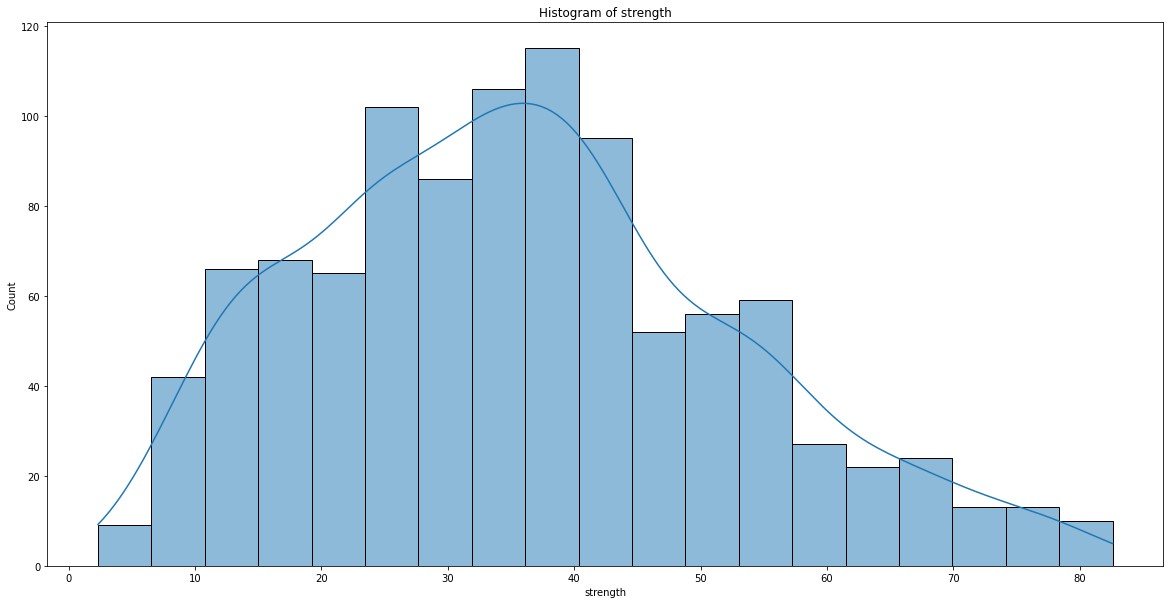

In [7]:
# Visualize the target column.
plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data=df,x='strength', kde=True);

The histogram in the accompanying plot shows that the strength in the data set follows a normal distribution. The target column is normally distributed.

In [8]:
# Check duplicates in dataframe.
df.duplicated().sum()

25

In [9]:
# View the duplicate records.
duplicates = df.duplicated()
df[duplicates]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


The duplicates in our concrete dataset are depicted in the ocde output above. As we attempt to clean up the data, we can drop these rows.

In [10]:
# Delete duplicate rows.
df.drop_duplicates(inplace=True)

In [11]:
# Get the shape of Concrete data.
df.shape

(1005, 9)

In [12]:
# Get the top five rows.
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


## Check Outliers

We'll start by finding each outlier, correcting it, and removing the ones that need to go.

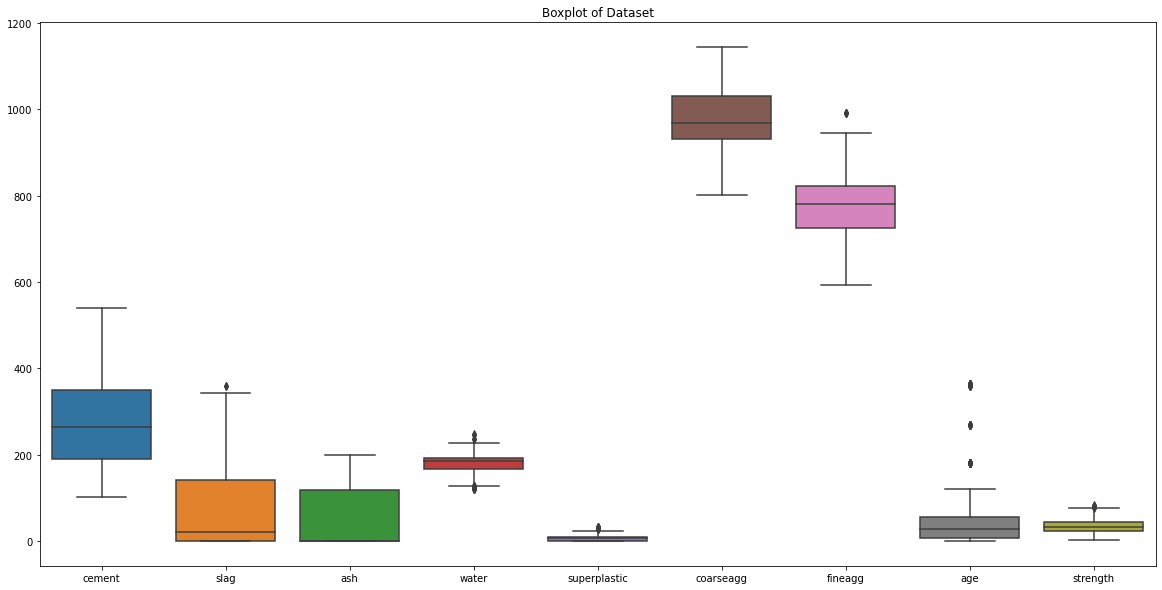

In [13]:
# Make a boxplot for all of the continuous variables.
plt.figure(figsize=(20,10))
plt.title('Boxplot of Dataset')
sns.boxplot(data=df);

As we can see, the dataset contains various outliers. Outliers in the Slag, Water, Superplastic, Fineagg, Age, and Strength columns must be addressed.

In [14]:
# Get a statistical representation of the dataset.
concrete_df_outliers = pd.DataFrame(df.loc[:,])

# Calculate IQR
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [15]:
# Get all columns of dataframe.
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

To preserve only valid values, we use the IQR score to filter out the outliers.

In [16]:
# For the 'water','superplastic', 'fineagg', 'age', and'strength' columns, replace every outlier on the top side with 
# the upper whisker.
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]
    
# For the 'water' column, replace every outlier on the lower side with the lower whisker.
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = whisker[j]

In [17]:
# 'Water','superplastic', 'fineagg', 'age', 'water', and'strength' are all outliers that should be removed.
df.drop(columns = df.loc[:,], inplace = True)

In [18]:
# Add 'water', 'superplastic', 'fineagg', 'age', 'water' and 'strength' with no outliers from concrete_df_outliers to df.
df = pd.concat([df, concrete_df_outliers], axis = 1)

### Check Outlier After Correction

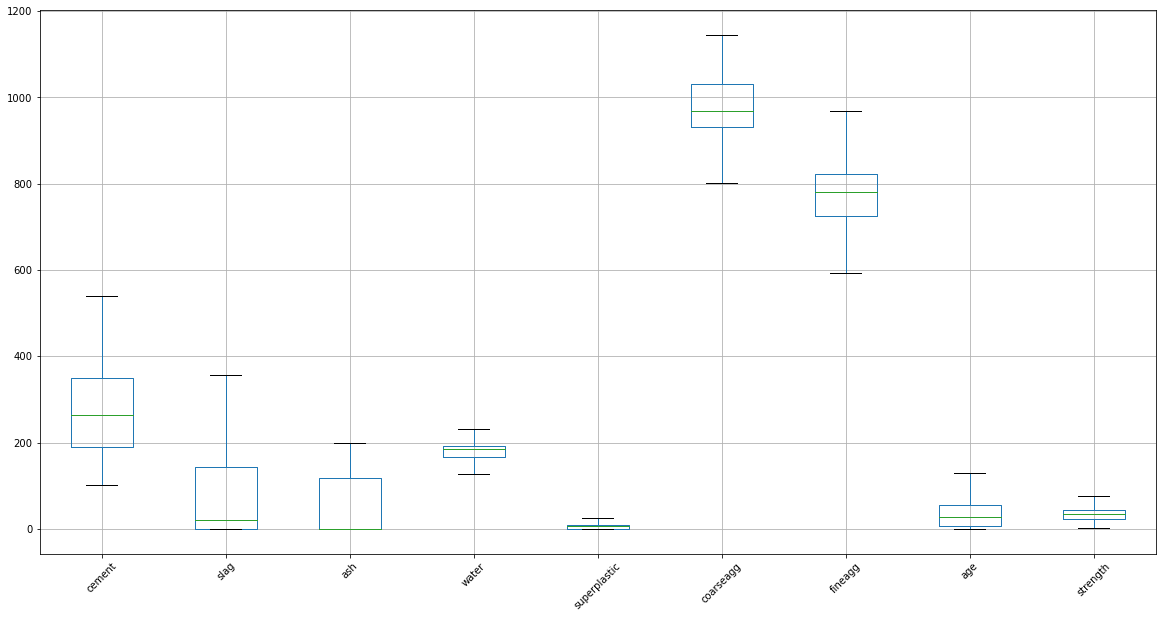

In [19]:
# Create a boxplot for all the continuous features
df.boxplot(column = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'], rot=45, figsize = (20,10));

Notice now that the dataset is clean with no outliers.

In [20]:
## Get the cleaned concrete data.
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,25.0,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,129.5,55.06


In [21]:
# Make sure there are no missing values.
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [22]:
# Using a loop, check for missing data.
concrete_df_missval = df.copy()   # Make a copy of the dataframe
isduplicates = False

for x in concrete_df_missval.columns:
    concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")
    result = concrete_df_missval[x].astype(str).str.isalnum() # Check whether all characters are alphanumeric
    if False in result.unique():
        isduplicates = True
        print('For column "{}" unique values are {}'.format(x, concrete_df_missval[x].unique()))
        print('\n')
        
if not isduplicates:
    print('No duplicates in this dataset')

No duplicates in this dataset


<ipython-input-22-0720a3433956>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  concrete_df_missval[x] = concrete_df_missval[x].astype(str).str.replace(".", "")


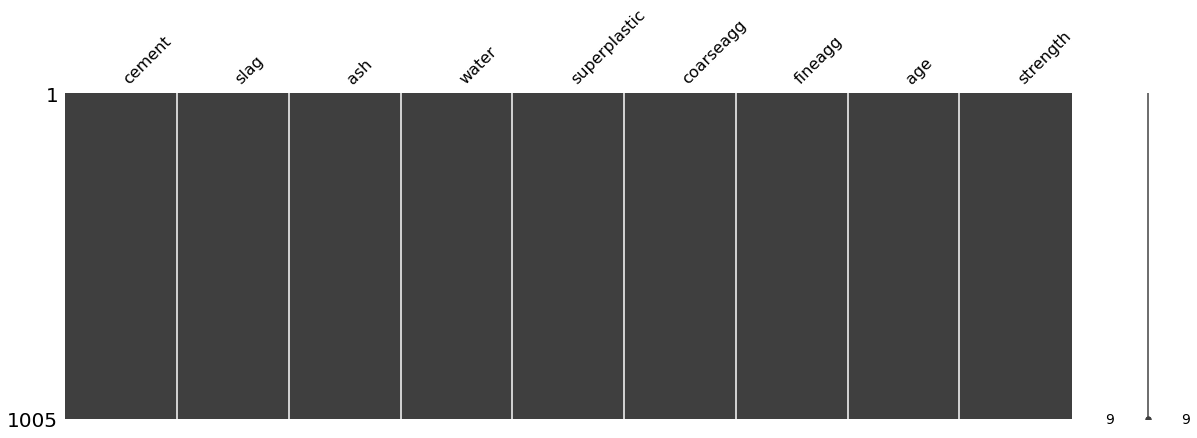

In [23]:
## Visualize the values that are missing if there be any.
import missingno as mno
mno.matrix(df, figsize = (20, 6));

In [24]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.000
slag,1005.0,72.037214,86.149994,0.00,0.00,20.0,142.50,356.250
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.100
water,1005.0,182.066816,21.158645,127.15,166.60,185.7,192.90,232.350
superplastic,1005.0,5.981493,5.724463,0.00,0.00,6.1,10.00,25.000
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.000
fineagg,1005.0,772.571095,80.035934,594.00,724.30,780.0,822.20,969.050
age,1005.0,38.076119,35.862549,1.00,7.00,28.0,56.00,129.500
strength,1005.0,35.226318,16.220253,2.33,23.52,33.8,44.87,76.895


### Data Cleaning Summary

We found 25 duplicate instances in the dataset and removed them. We also had outliers in the 'Water,' 'Superplastic,' 'Fineagg,' 'Age,' and 'Strength' columns, which we managed by replacing each outlier with the top side of the whisker. We also had outliers in the 'Water' column, which we dealt with by replacing each outlier with the bottom side of the whisker. There are no missing values in the dataset.

## EXploratory Data Analysis

Begin by plotting the target feature against the various input variables to see if there are any correlations.

## Multivariate Analysis using Strength as the Dependent Variable.

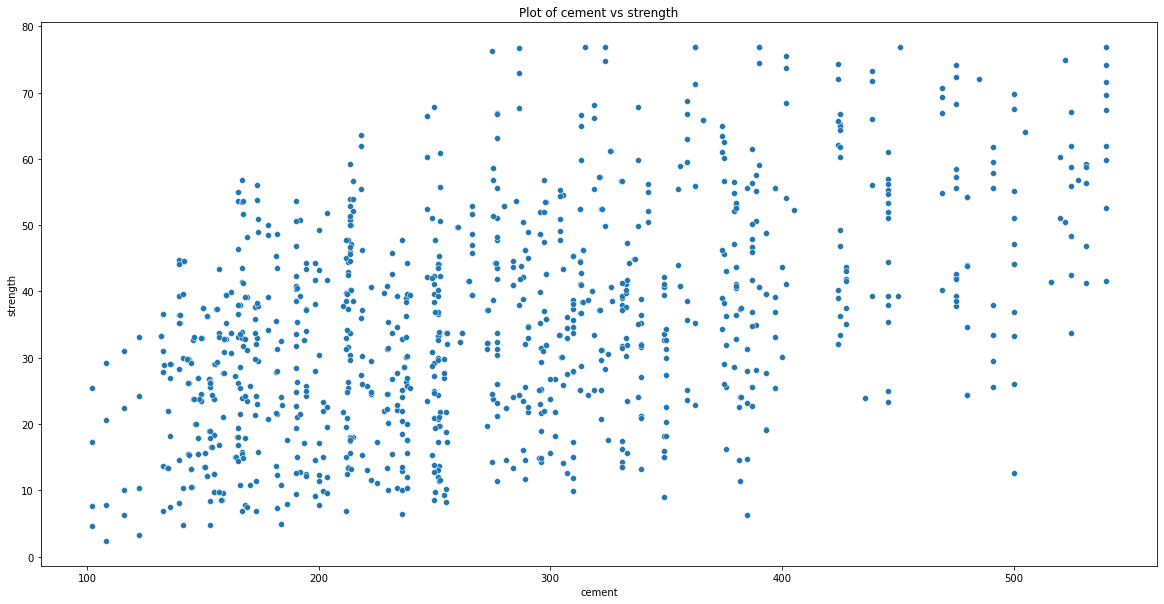

In [25]:
plt.figure(figsize=(20,10))
plt.title('Plot of cement vs strength')
sns.scatterplot(data=df, x='cement', y= 'strength');

Strength vs. Cement: the graph shows a curve-linear relationship with Cement. Thus, Cement is a good predictor of concrete strength.

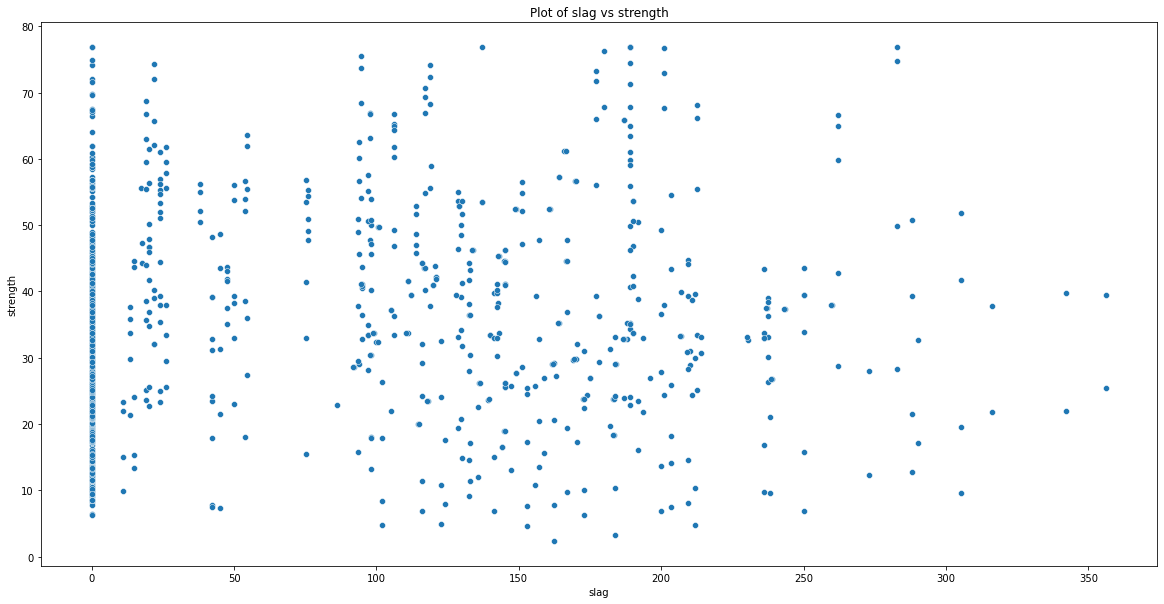

In [26]:
plt.figure(figsize=(20,10))
plt.title('Plot of slag vs strength')
sns.scatterplot(data=df, x='slag', y= 'strength');

Strength vs. Slag: it appears to have a weak relationship with concrete Slag because there is a cloud of points or rectangular shape.

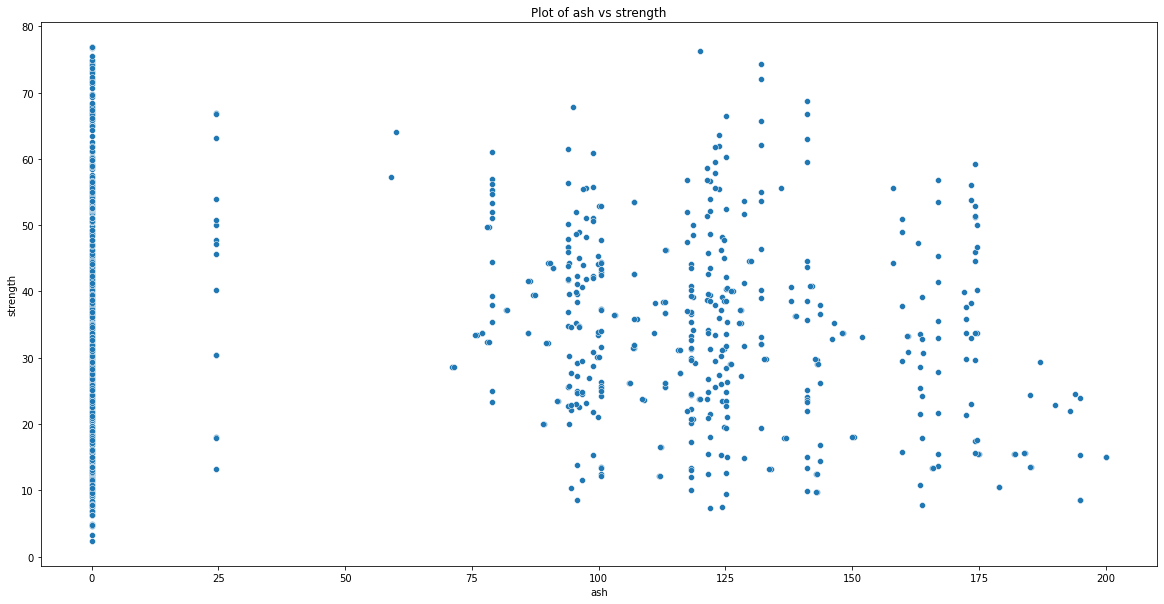

In [27]:
plt.figure(figsize=(20,10))
plt.title('Plot of ash vs strength')
sns.scatterplot(data=df, x='ash', y= 'strength');

Strength vs. Ash: it has a weak relationship with concrete Ash because there is a cloud of points or rectangular shape.

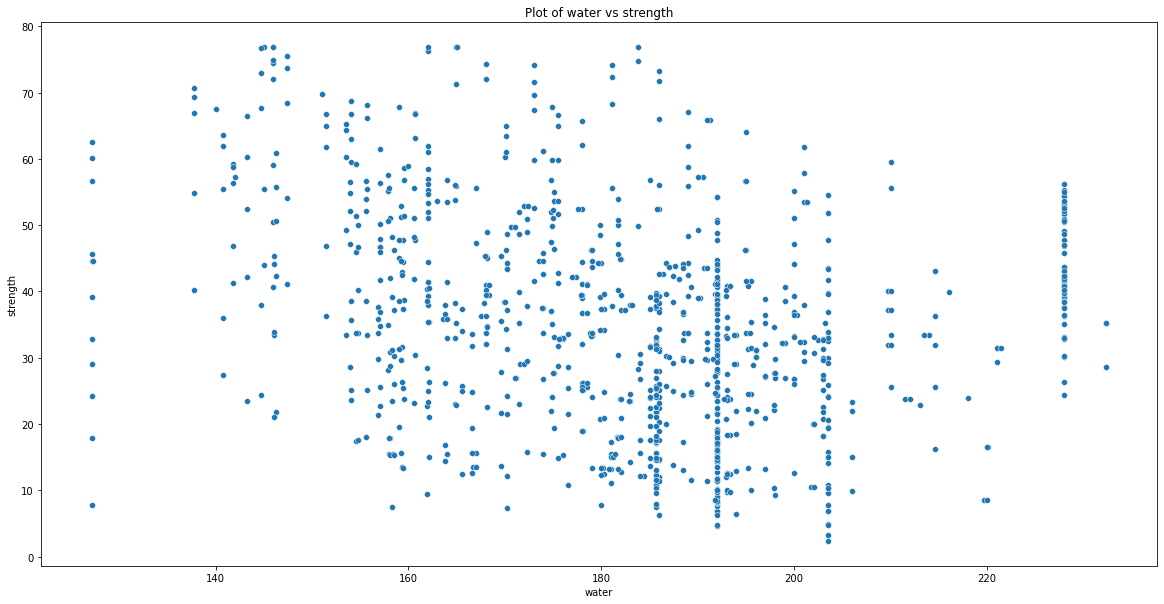

In [28]:
plt.figure(figsize=(20,10))
plt.title('Plot of water vs strength')
sns.scatterplot(data=df, x='water', y= 'strength');

Strength vs. Water: the graph shows a curve-linear relationship with Water, thus making it a good predictor of concrete strength.

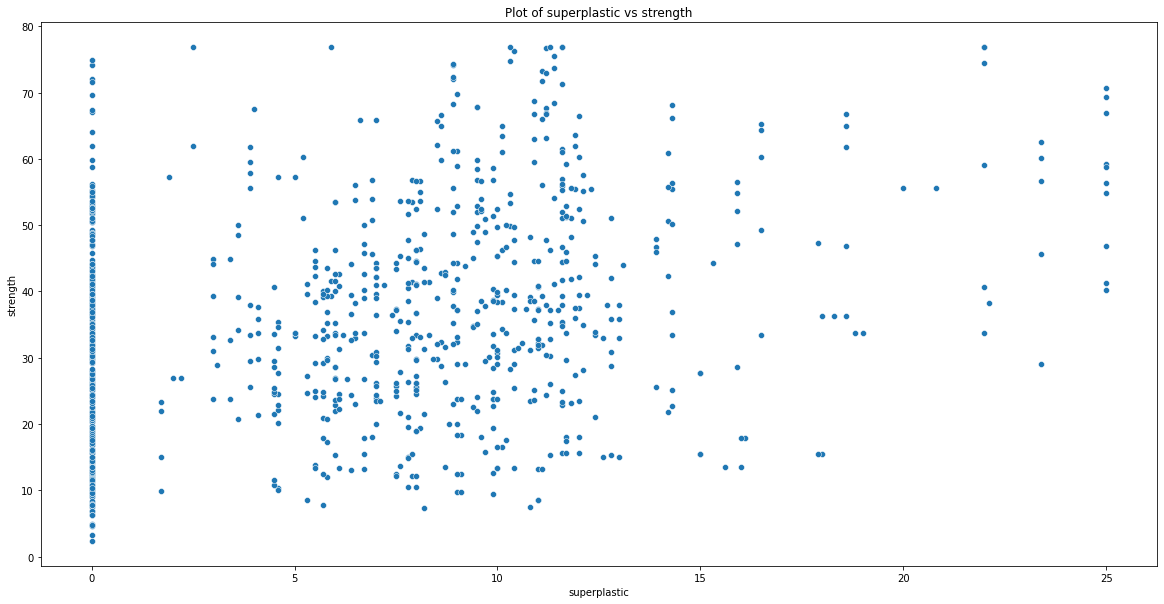

In [29]:
plt.figure(figsize=(20,10))
plt.title('Plot of superplastic vs strength')
sns.scatterplot(data=df, x='superplastic', y= 'strength');

Strength vs. Superplastic: this shows a weak relationship with Superplastic because there is a cloud of balloon-shaped points, but it might be a good predictor of concrete strength.

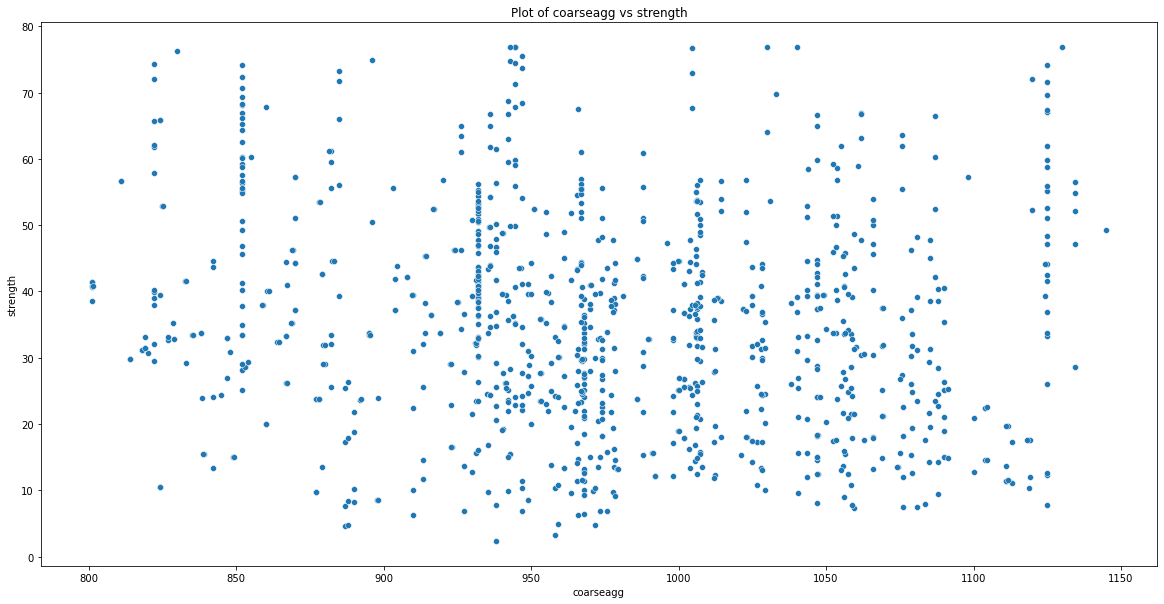

In [30]:
plt.figure(figsize=(20,10))
plt.title('Plot of coarseagg vs strength')
sns.scatterplot(data=df, x='coarseagg', y= 'strength');

Strength vs. Coarseagg: this graph shows a weak relationship with concrete Coarseagg because of the cloud of rectangular points.

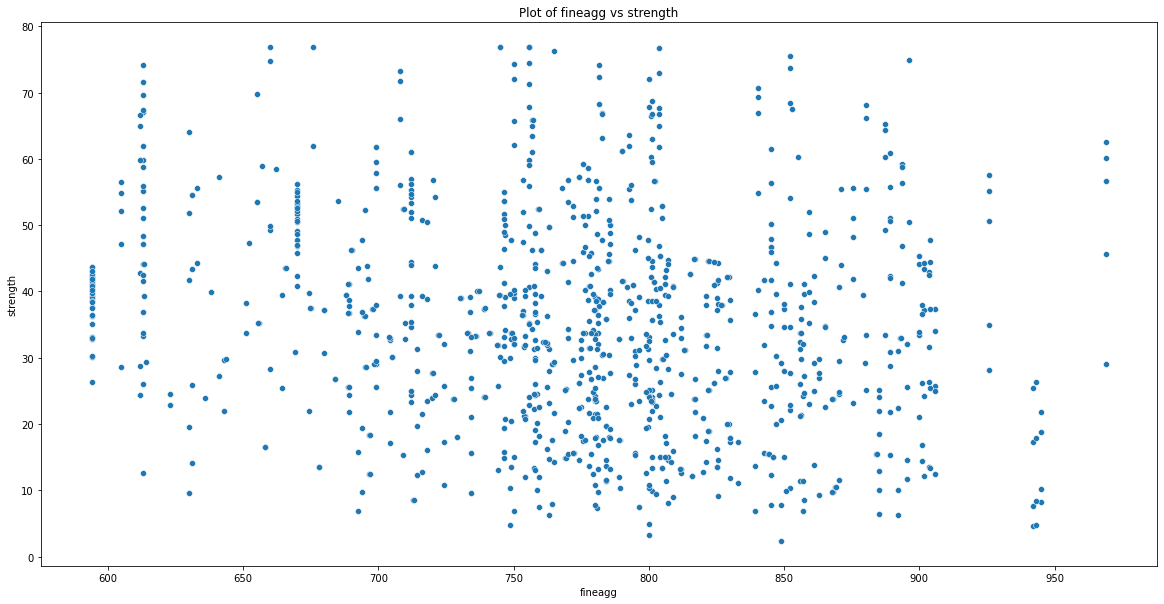

In [31]:
plt.figure(figsize=(20,10))
plt.title('Plot of fineagg vs strength')
sns.scatterplot(data=df, x='fineagg', y= 'strength');

Strength vs. Fineagg: it has a weak relationship with concrete Fineagg because of the cloud of rectangular points.

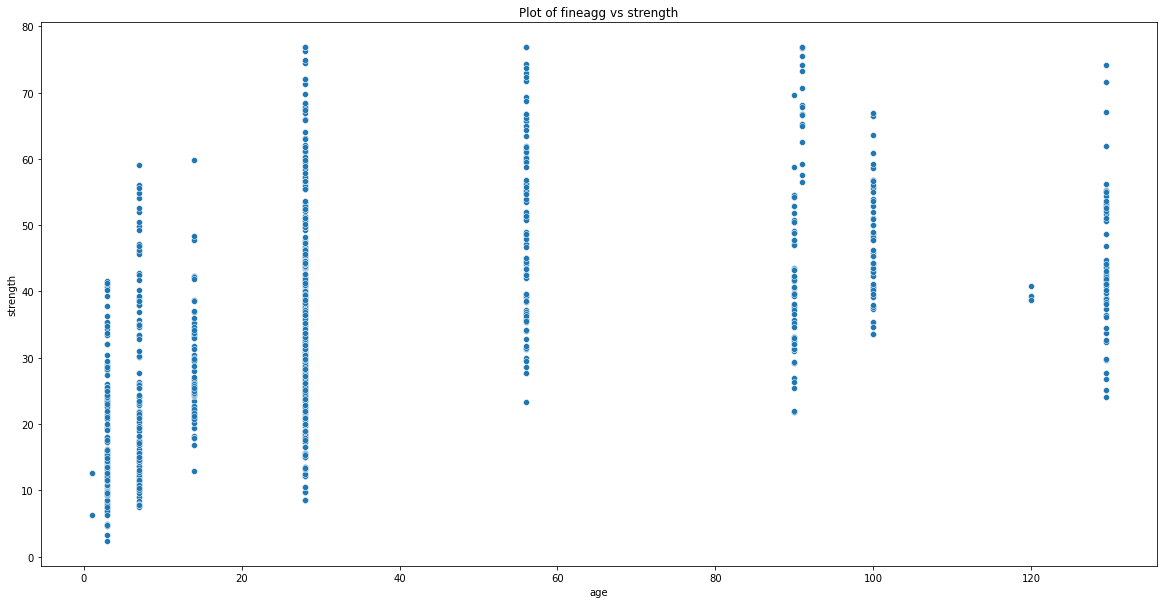

In [32]:
plt.figure(figsize=(20,10))
plt.title('Plot of fineagg vs strength')
sns.scatterplot(data=df, x='age', y= 'strength');

Strength vs. Age: this one shows a curve-linear relationship with concrete Age, and it might be a good predictor of concrete strength.

This multivariate analysis summarizes that Cement, Water, Superplastic, and Age can be good predictors of concrete Strength.

### Univariate Analysis

In [33]:
# Get the individual columns
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

### Target variable: 'Strength'
### Predictors or input varibles: 'Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg', 'Fineagg', 'Age'

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\d

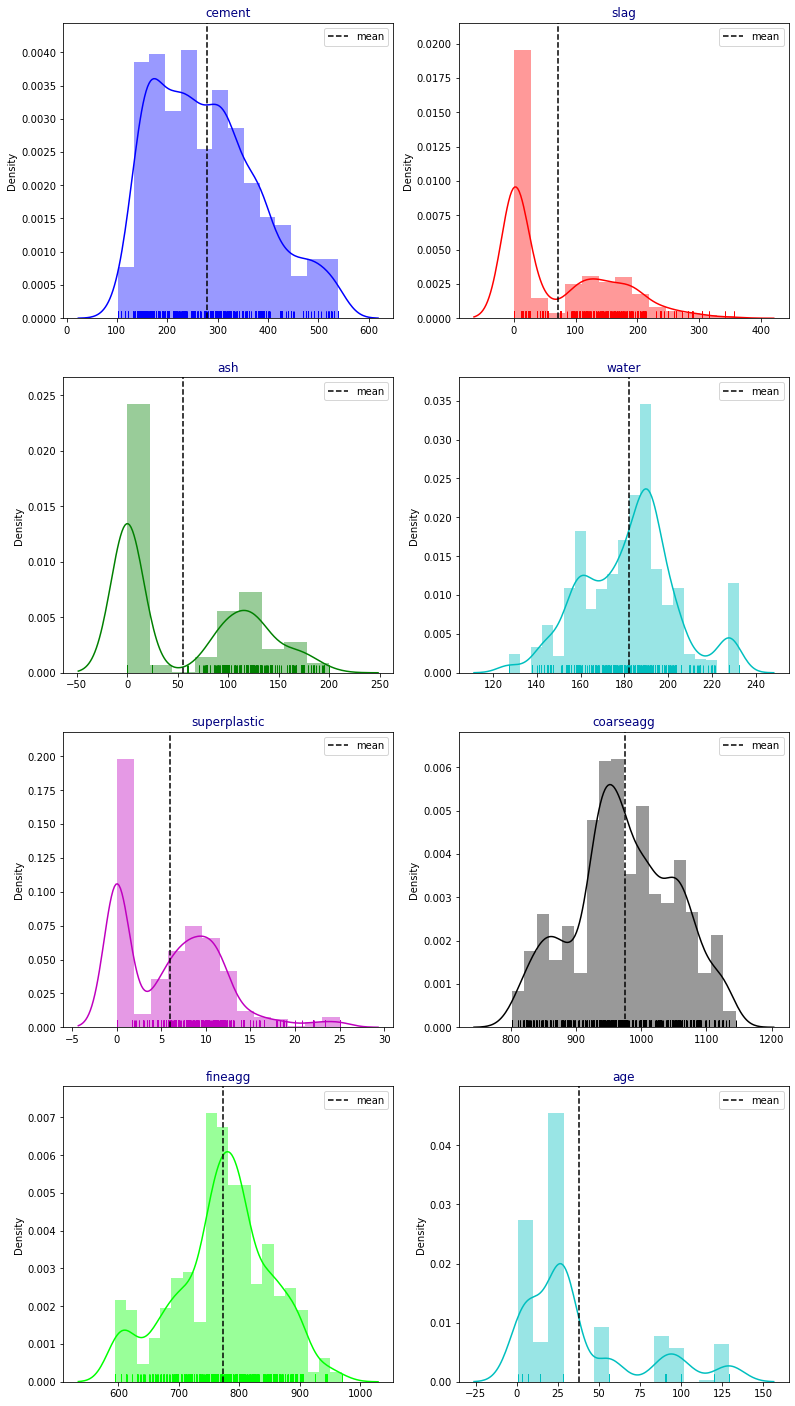

In [34]:
# Visualize the predictors.
cols = [i for i in df.columns if i not in 'strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


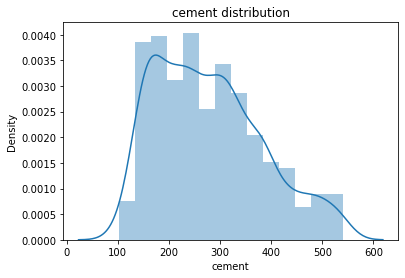

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


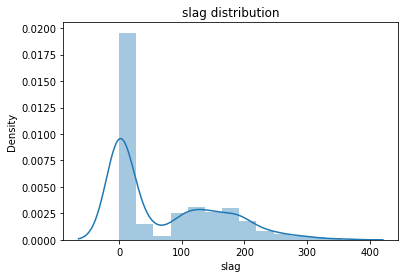

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


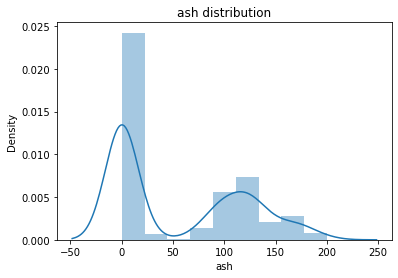

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


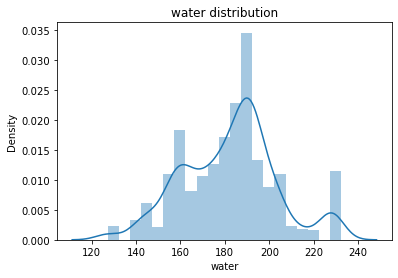

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


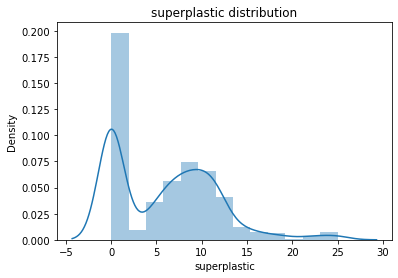

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


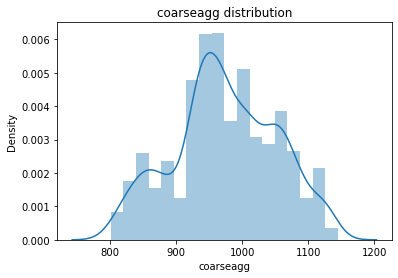

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


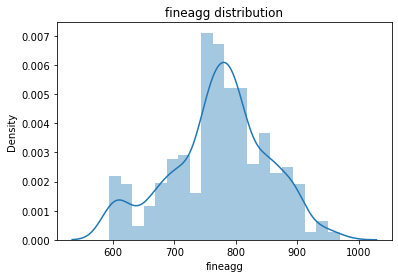

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


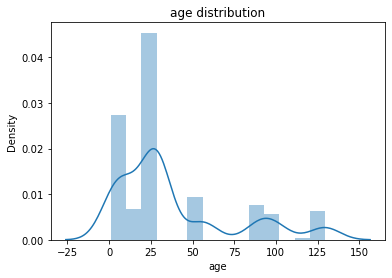

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


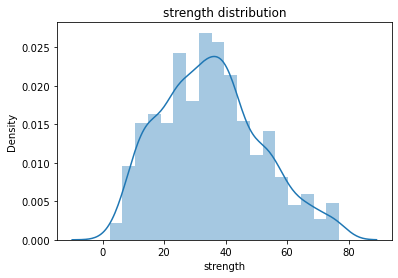

In [35]:
# Another way to visualize the input variables.
for x in df:
    sns.distplot(df[x]);
    plt.title("{} distribution".format(x))
    plt.show()

## Univariate Result

The following conclusions can be drawn from the graphs above:

1. The cement column's distribution is slanted to the right. That is, the cement has been skewed toward high values.
2. The distribution of slag columns is also skewed to the right. There are two gaussians and it is tilted to higher values.
3. The ash column is also skewed to the right. There are two gaussians and it is tilted to large values.
4. The water column distribution is moderately tilted to the left.
5. The distribution of the superplastic column is right skewed. There are two gaussians and it is tilted to higher values.
6. The coarseagg column has a skewed distribution to the left.
7. The Fineagg column also has a left-skewed distribution.
8. There is a right skewed distribution in the age column. There are five gaussians, and the age is skewed to higher values.

### Let's get the concrete compressive strength distribution for the target column.

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


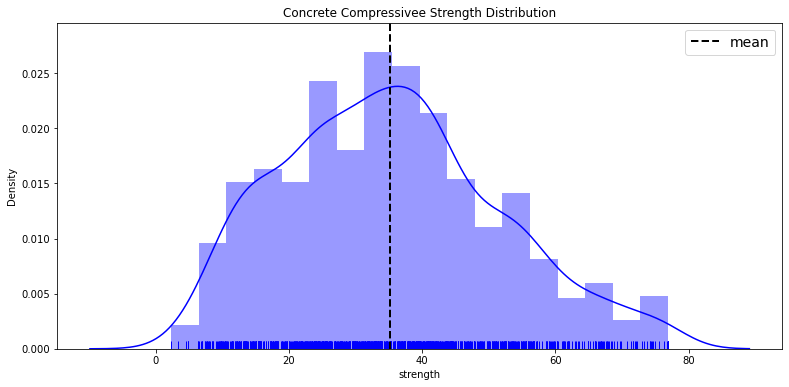

In [36]:
plt.figure(figsize=(13,6))
sns.distplot(df["strength"],color="b",rug=True)
plt.axvline(df["strength"].mean(), linestyle="dashed",color="k", label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Concrete Compressivee Strength Distribution")
plt.show()

The strength column in the graph above appears to be uniformly or normally distributed.

## Correlation Analysis

In [37]:
# Check the Correlation
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,0.488690
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.102440
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.079685
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,-0.271381
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.342983
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.145794
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.188509
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.476726
strength,0.488690,0.102440,-0.079685,-0.271381,0.342983,-0.145794,-0.188509,0.476726,1.000000


Use heatmap to check the data correlation.

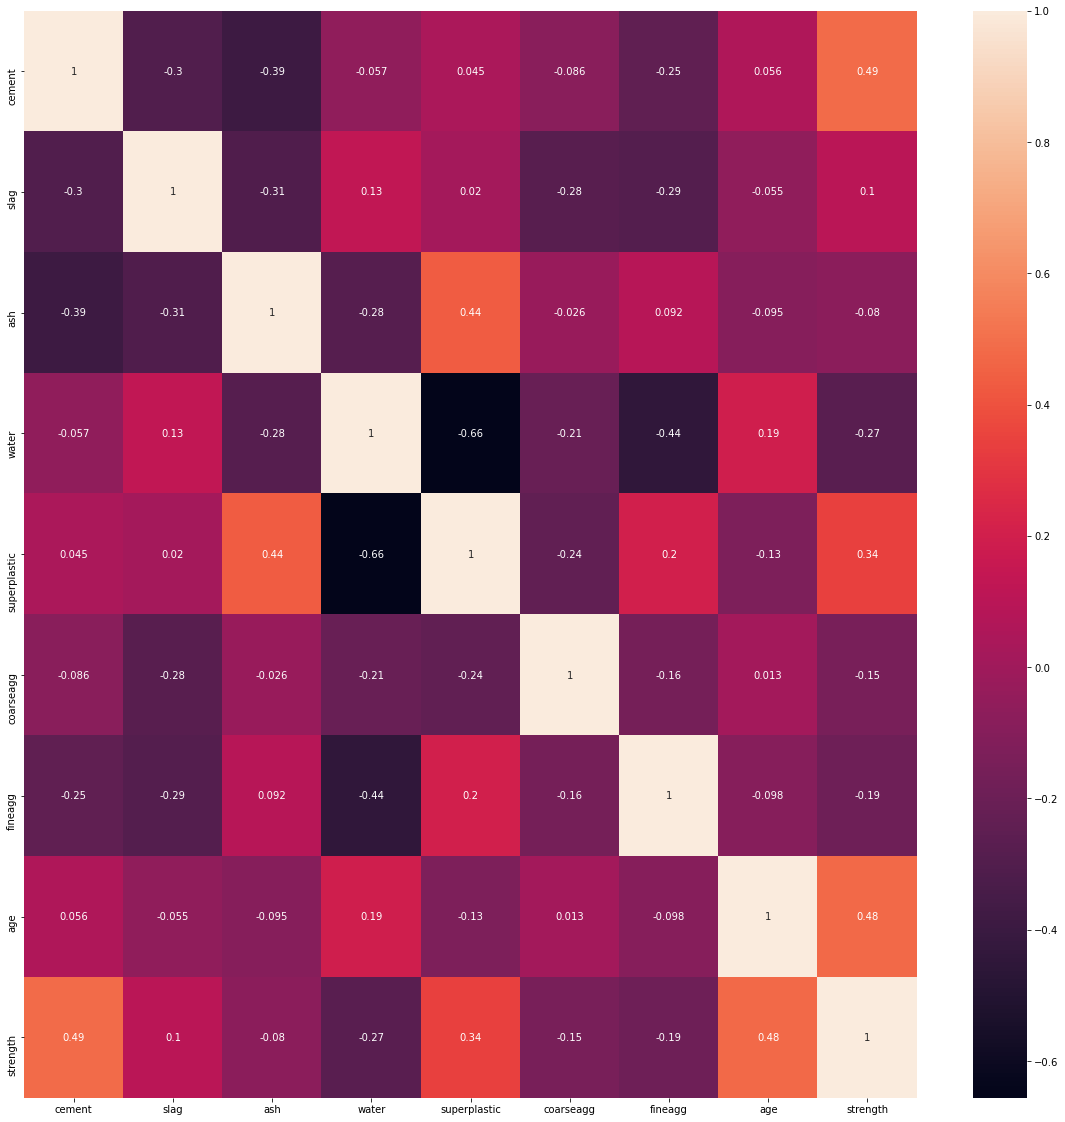

In [38]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True);

The heatmap can be summarized as follows:

In [39]:
df.corr()['strength'].sort_values()[:-1]

water          -0.271381
fineagg        -0.188509
coarseagg      -0.145794
ash            -0.079685
slag            0.102440
superplastic    0.342983
age             0.476726
cement          0.488690
Name: strength, dtype: float64

The concrete strength strongly correlates to superplastic, cement, and age, showing a negative correlation with water.

## Modelling

In [40]:
# Prepare the dataset for modelling.
X = df.drop('strength', axis=1)
y = df['strength']

In [41]:
# Import packages to preprocess the data for modelling.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
# Split dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Apply standard scaler to dataset. 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Import Models

For this analysis, we'll develop models using various algorithms and then choose the one that performs the best.

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor

## Baseline Models and Scores

In [45]:
# Import model scoring metrics for regression analysis.
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    model_rsme = {}
    model_r2 = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
        y_preds = model.predict(X_test)
        model_rsme[name] = np.sqrt(mean_squared_error(y_test,y_preds))
        model_r2[name] = r2_score(y_test,y_preds)

    model_scores = pd.DataFrame(model_scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    model_rsme = pd.DataFrame(model_rsme, index=['RSME']).transpose()
    model_rsme = model_rsme.sort_values('RSME')
    
    model_r2 = pd.DataFrame(model_r2, index=['R2']).transpose()
    model_r2 = model_r2.sort_values('R2')
        
    return model_scores,model_rsme, model_r2

In [47]:
models = {'Ridge' : Ridge(),
         'Lasso': Lasso(),
         'ElasticNet': ElasticNet(),
         'KNeighborsRegressor': KNeighborsRegressor(),
         'SVR': SVR(),
         'DecisionTreeRegressor': DecisionTreeRegressor(),
         'RandomForestRegressor':RandomForestRegressor(),
         'GradientBoostingRegressor': GradientBoostingRegressor(),
         'AdaBoostRegressor': AdaBoostRegressor(),
        'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
        'XGBRFRegressor': XGBRFRegressor(objective='reg:squarederror'),
          'CatBoostRegressor': CatBoostRegressor(verbose=0)
         }

In [48]:
model_scores_baseline, model_rsme_baseline, model_r2_baseline = fit_and_score(models, X_train, X_test, y_train, y_test)

In [49]:
model_scores_baseline

,Score
ElasticNet,0.581881
Lasso,0.657177
Ridge,0.695192
SVR,0.701459
KNeighborsRegressor,0.756355
AdaBoostRegressor,0.793640
DecisionTreeRegressor,0.861540
XGBRFRegressor,0.864191
GradientBoostingRegressor,0.899390
RandomForestRegressor,0.921435


The CatBoostRegressor appears to be the best performer among the scored models above.

In [50]:
# For each model, calculate the Root Mean Square Error.
model_rsme_baseline.sort_values('RSME', ascending=False)

,RSME
ElasticNet,10.601952
Lasso,9.599993
Ridge,9.052101
SVR,8.958554
KNeighborsRegressor,8.093102
AdaBoostRegressor,7.448165
DecisionTreeRegressor,6.100950
XGBRFRegressor,6.042262
GradientBoostingRegressor,5.200646
RandomForestRegressor,4.595690


The RMSE of the CatBoostRegressor algorithm is the lowest.

In [51]:
# For each model, calculate the R2.
model_r2_baseline

,R2
ElasticNet,0.581881
Lasso,0.657177
Ridge,0.695192
SVR,0.701459
KNeighborsRegressor,0.756355
AdaBoostRegressor,0.793640
DecisionTreeRegressor,0.861540
XGBRFRegressor,0.864191
GradientBoostingRegressor,0.899390
RandomForestRegressor,0.921435


R-squared or R2 explains the degree to which our input variables explain the variation of our output or predicted variable. For example, since the CatBoostRegressor R-square is 0.93, it then means that the input variables explain 93% of the variation in the output variable.

In [52]:
# Get the dataframe's average value.
df['strength'].mean()

35.22631840796023

### Catboost

In [53]:
model = CatBoostRegressor(iterations=10000, verbose=0)
model.fit(X_train,y_train, eval_set=[(X_test,y_test)],early_stopping_rounds=50)

## Model Evalution

In [54]:
y_preds = model.predict(X_test)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

In [57]:
print(f'mean absolute error: {mae}')
print(f'Mean squared error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')

mean absolute error: 2.459677040060097
Mean squared error: 16.68943955580173
Root Mean Squared Error: 4.085271050469201
R2 Score: 0.9379174328751724


## Feature Importance

In [58]:
feat_impt = pd.DataFrame(model.feature_importances_, index=X.columns)

In [59]:
feat_impt

,0
cement,24.285265
slag,10.113109
ash,2.239796
water,13.264107
superplastic,8.130986
coarseagg,3.472859
fineagg,5.710077
age,32.783801


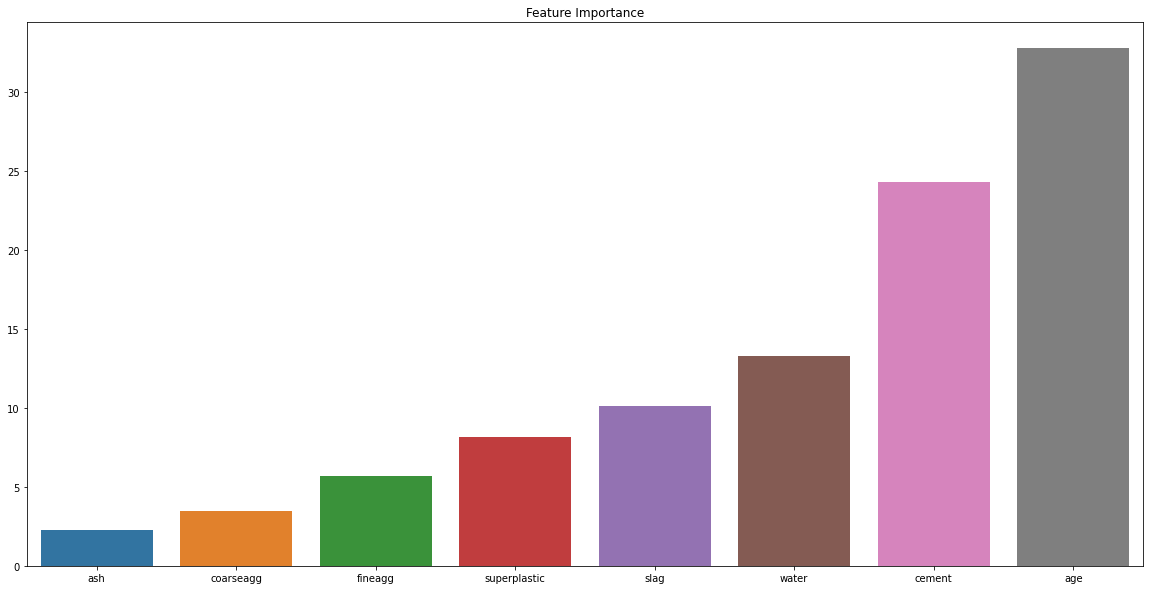

In [60]:
plt.figure(figsize=(20,10))
plt.title('Feature Importance')
sns.barplot(data= feat_impt.sort_values(0).T);

## Evalution using cross_validation

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
def get_cv_score(model, X, y, cv=5):
    
    
    cv_r2 = cross_val_score(model,X,y,cv=cv,
                         scoring='r2')
    print(f'Cross Validaion R2 Scores: {cv_r2}')
    print(f'Cross Validation R2 Mean Score: {cv_r2.mean()}')
    
    cv_neg_mean_absolute_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_mean_absolute_error')
    print(f'Cross Validaion Neg MAE Scores: {cv_neg_mean_absolute_error}')
    print(f'Cross Validation Neg MAE Mean Score: {cv_neg_mean_absolute_error.mean()}')
    
    cv_neg_mean_squared_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_mean_squared_error')
    print(f'Cross Validaion Neg MSE Scores: {cv_neg_mean_squared_error}')
    print(f'Cross Validation Neg MSE Mean Score: {cv_neg_mean_squared_error.mean()}')
    
    cv_neg_root_mean_squared_error = cross_val_score(model,X,y,cv=cv,
                         scoring='neg_root_mean_squared_error')
    print(f'Cross Validaion Neg RMSE Scores: {cv_neg_root_mean_squared_error}')
    print(f'Cross Validation Neg RMSE Score: {cv_neg_root_mean_squared_error.mean()}')   
    
    cv_merics = pd.DataFrame({'R2': cv_r2.mean(),
                         'neg_mean_absolute_error': cv_neg_mean_absolute_error.mean(),
                         'neg_mean_squared_error': cv_neg_mean_squared_error.mean(),
                         'neg_root_mean_squared_error': cv_neg_root_mean_squared_error.mean()},index=[0])
    
    return cv_merics

In [63]:
cv_model = CatBoostRegressor(iterations=4524,verbose=0)

In [64]:
cv_merics = get_cv_score(cv_model, X_train, y_train, cv=5)

Cross Validaion R2 Scores: [0.92165506 0.94531488 0.92778999 0.93820927 0.9254258 ]
Cross Validation R2 Mean Score: 0.9316790003490327
Cross Validaion Neg MAE Scores: [-2.81760764 -2.7498246  -2.77103495 -2.75566512 -2.92663453]
Cross Validation Neg MAE Mean Score: -2.8041533683962148
Cross Validaion Neg MSE Scores: [-19.65866099 -15.46911876 -17.43657097 -14.83478362 -20.57444682]
Cross Validation Neg MSE Mean Score: -17.59471623068608
Cross Validaion Neg RMSE Scores: [-4.43380886 -3.93308006 -4.17571203 -3.85159494 -4.53590639]
Cross Validation Neg RMSE Score: -4.186020457689168


In [65]:
cv_merics

,R2,neg_mean_absolute_error,neg_mean_squared_error,neg_root_mean_squared_error
0,0.931679,-2.804153,-17.594716,-4.18602


#### Conclusion

Yes, I can confidently propose CatBoostRegressor as the top-performing model to a company that is interested. Its exceptional performance metrics, including high R2 scores and low RMSE, make it a reliable choice for predicting concrete compressive strength. Depending on the organization's requirements, this model can be seamlessly integrated into a website or an app for practical use. Additionally, its flexibility allows for further customization to align with the specific needs of any company, ensuring it delivers optimal results in diverse scenarios.